### Tensor

**A tensor is defined by three attributes:**

- **Number of axes (rank)** - a 3D tensor has three axes, and a matrix has two axes. This is also called the tensor's **ndim** in Python libraries such as Numpy.

- **Shape** - This is a tuple of integers that describes how many dimensions the tensor has along each axis. For example, a **matrix** may have a shape (3,5), and a **3D tensor** may have (3,3,5). A **vector** has a shape with a single element, such as (5,), where a **scalar** has a empty shape, (). 

- **Data type (usually called dtype in Python libraries)** - This is the type of the data contained in the tensor, such as float32, uint8, float64, and so on. 

In [2]:
import numpy as np

x = np.array([1,2,3,6,14])
print(x)
print(x.ndim)

[ 1  2  3  6 14]
1


This vector has five entries and so is called a **5-dimensional vector**.

**Don’t confuse a 5D vector with a 5D tensor!**

A 5D vector has only one axis and has five dimensions along its axis, whereas a 5D tensor has five axes (and may have any number of dimensions along each axis). 

Dimensionality can denote either the number of entries along a specific
axis (as in the case of our 5D vector) or the number of axes in a tensor (such as a
5D tensor), which can be confusing at times.

In the latter case, **it’s technically more correct to talk about a tensor of rank 5 (the rank of a tensor being the number of axes),**
but the ambiguous notation 5D tensor is common regardless.

In [4]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
print(train_images.shape)

(60000, 28, 28)


In [6]:
print(train_images.dtype)

uint8


What we have here is a 3D tensor of 8-bit integers. 

More precisely, it’s an array of 60,000 matrices of 28 × 8 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255.

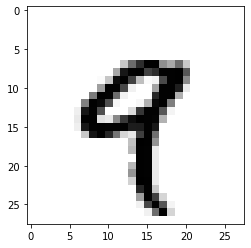

In [7]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [8]:
digit.shape

(28, 28)

In [9]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In general, the first axis (axis 0) in all data tensors you'll come across in deep learning will be the **samples axis** (sometimes called the samples dimension). In the MNIST example, sampes are images of digits.

In addition, deep-learning models don't process an entire dataset at once; rather, they break the data into small **batches**. 

In [10]:
batch1 = train_images[:128]

# And the nth batch
# batch = train_images[128 * n : 128 * (n+1)]

When considering such a batch tensor, the first axis (axis 0) is called the **batch axis** or **batch dimension**.


### Real-world examples of data tensors

#### Vector data - 2D tensors of shape (samples, features)

The first axis is the samples axis and the second axis is the features axis.

Let’s take a look at two examples:
 - An actuarial dataset of people, where we consider each person’s age, ZIP code,
and income. Each person can be characterized as a vector of 3 values, and thus
an entire dataset of 100,000 people can be stored in a 2D tensor of shape
(100000, 3).

- A dataset of text documents, where we represent each document by the counts
of how many times each word appears in it (out of a dictionary of 20,000 common
words). Each document can be encoded as a vector of 20,000 values (one
count per word in the dictionary), and thus an entire dataset of 500 documents
can be stored in a tensor of shape (500, 20000).

#### Timeseries data or sequence data

Whenever time matters in your data (or the notion of sequence order), it makes sure to store it in a 3D tensor with an explicit time axis. 

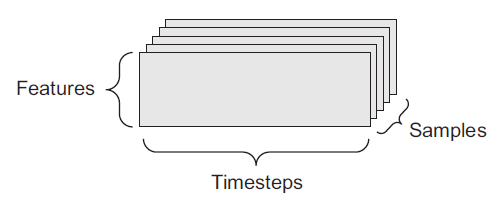

**The time axis is always the second axis (axis of index 1), by convention**. Let’s look at a few examples:
- A dataset of stock prices. Every minute, we store the current price of the stock,
the highest price in the past minute, and the lowest price in the past minute.
Thus every minute is encoded as a 3D vector, an entire day of trading is
encoded as a 2D tensor of shape (390, 3) (there are 390 minutes in a trading
day), and 250 days’ worth of data can be stored in a 3D tensor of shape (250,
390, 3). Here, each sample would be one day’s worth of data.
- A dataset of tweets, where we encode each tweet as a sequence of 280 characters
out of an alphabet of 128 unique characters. In this setting, each character can
be encoded as a binary vector of size 128 (an all-zeros vector except for a 1 entry
at the index corresponding to the character). Then each tweet can be encoded
as a 2D tensor of shape (280, 128), and a dataset of 1 million tweets can be
stored in a tensor of shape (1000000, 280, 128).

#### Image Data

Images typically have three dimensions: height, width, and color depth. 

Although grayscale images (like our MNIST digits) have only a single color channel and could
thus be stored in 2D tensors, by convention image tensors are always 3D, with a onedimensional
color channel for grayscale images. 

A batch of 128 grayscale images of size 256 × 256 could thus be stored in a tensor of shape (128, 256, 256, 1), and a
batch of 128 color images could be stored in a tensor of shape (128, 256, 256, 3).

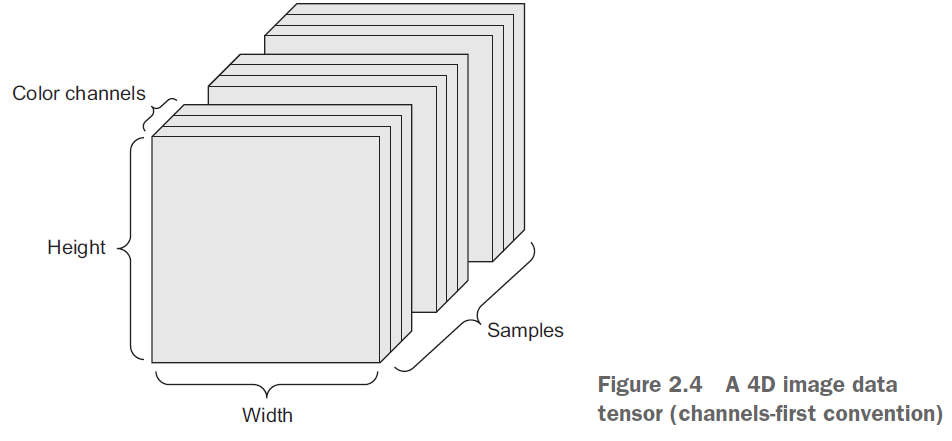

There are two conventions for shapes of images tensors: the **channels-last** convention (used by TensorFlow) and the **channels-first** convention (used by Theano).

The TensorFlow machine-learning framework, places the color-depth axis at the end: (samples, height, width, color-depth).
Meanwhile, Theano places the color depth axis right after the batch axis: (samples, color-depth, height, width). 

The Keras framework provides support for both formats.

#### Video data

A batch of different videos can be stored in a 5D tensor of shape: (samples, frames, height, width, color-depth)

For instance, a 60-second, 144 × 256 YouTube video clip sampled at 4 frames per second would have 240 frames. A batch of four such video clips would be stored in a tensor of shape (4, 240, 144, 256, 3).



### Tensor Operations

To build network by stacking **Dense** layers on top of each other. A Keras layer instance looks like this:

    keras.layers.Dense(512, activation='relu')

This layer can be interpreted as a function, which takes as input as a 2D tensor and returns another 2D tensor - a new representation for the input tensor. 

Specially, the function is as follows (where W is a 2D tensor and b is an vector, both attributes of the layer):
    
    output = relu(dot(W, input) + b)
    
    relu(x) is max(x, 0)



#### Element-wise operations

The *relu* operation and *addition(+)* are **element-wise** operations: operations that are applied independently to each entry in the tensor being considered. 

#### Broadcasting

In [11]:
a = np.array([1,2,3,4,5,6])
a.shape

(6,)

In [17]:
a_transpose = a.transpose()
a_transpose.shape

(6,)

In [15]:
a_transpose

array([1, 2, 3, 4, 5, 6])

#### Tensor dot

The dot operation, also called a **tensor product**, is the most common, most useful tensor operation. Contrary to element-wise operations, it combines entries in the input tensors. 

    import numpy as np
    z = np.dot(x,y)
    
    z = x . y



#### Tensor reshaping